<a href="https://colab.research.google.com/github/diljeetsansoa/scientific-calculator/blob/main/Sukhproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Absolute Error: 17.0
Mean Squared Error: 289.0
Predicted Prices for Next 10 Days: [1108.  1116.5 1128.  1135.  1136.  1161.5 1160.5 1135.5 1161.5 1139. ]


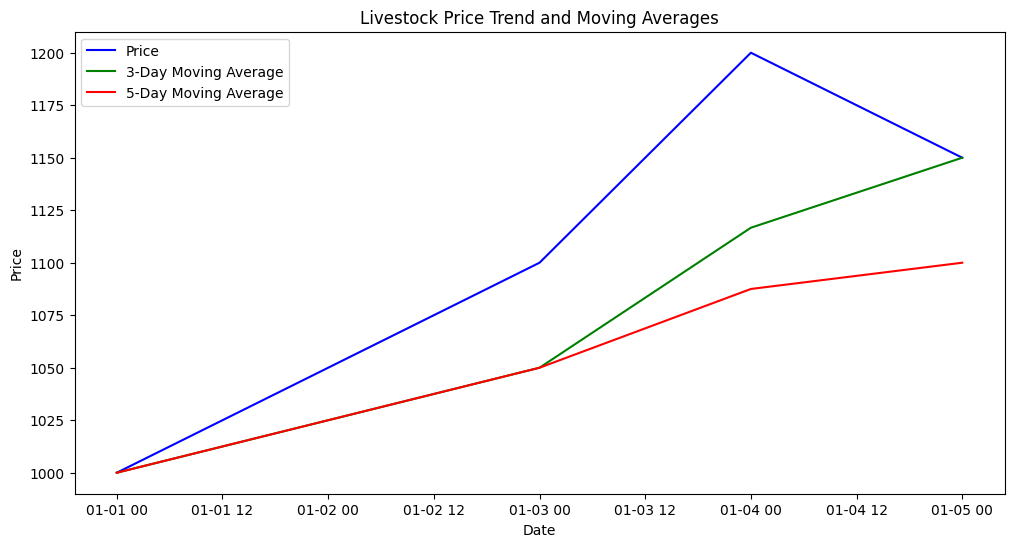

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 1. Data Collection (Simulated for this project)
# Simulating livestock market price data
data = {
    "Date": ["2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05"],
    "Price": [1000, 1050, 1100, 1200, 1150],
    "Weather_Condition": ["Sunny", "Cloudy", "Rainy", "Sunny", "Sunny"],
    "Demand_Index": [1.2, 1.3, 1.1, 1.4, 1.3],
    "Supply_Index": [1.0, 1.1, 0.9, 1.0, 1.2]
}

# Convert the data into a pandas DataFrame
data = pd.DataFrame(data)

# Parse the 'Date' column to datetime format and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 2. Feature Engineering
# Add moving averages to capture trend patterns
data['Moving_Avg_3'] = data['Price'].rolling(window=3,min_periods = 1).mean()
data['Moving_Avg_5'] = data['Price'].rolling(window=5,min_periods = 1).mean()

# Drop rows with NaN values created due to moving averages
#data = data.dropna()

# Extract Month and Day as features
data['Month'] = data.index.month
data['Day'] = data.index.day

# Feature selection
features = ['Weather_Condition', 'Demand_Index', 'Supply_Index', 'Moving_Avg_3', 'Moving_Avg_5', 'Month', 'Day']
X = data[features]
y = data['Price']

# 3. Data Preprocessing
# Encode categorical feature 'Weather_Condition'
X = pd.get_dummies(X, columns=['Weather_Condition'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Training
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# 5. Model Evaluation
# Evaluate the model's performance using mean absolute error and mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Visualize predicted vs actual prices
#plt.figure(figsize=(10, 6))
#plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
#plt.plot(y_test.index, y_pred, label='Predicted Price', color='red')
#plt.legend()
#plt.title('Livestock Price Prediction')
#plt.xlabel('Date')
#plt.ylabel('Price')
#plt.show()

# 6. Future Price Prediction (Simulating future data)
# Generate future dates for prediction
future_dates = pd.date_range(start='2024-01-01', periods=10, freq='D')
future_data = pd.DataFrame(index=future_dates)

# Simulate future features (weather conditions, demand, supply)
future_data['Weather_Condition'] = ['Sunny', 'Cloudy', 'Rainy', 'Sunny', 'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Sunny', 'Cloudy']
future_data['Demand_Index'] = np.random.uniform(1.0, 1.5, size=(10,))
future_data['Supply_Index'] = np.random.uniform(0.8, 1.2, size=(10,))
future_data['Moving_Avg_3'] = np.random.uniform(1100, 1200, size=(10,))
future_data['Moving_Avg_5'] = np.random.uniform(1100, 1200, size=(10,))
future_data['Month'] = future_data.index.month
future_data['Day'] = future_data.index.day

# Encode weather condition
future_data = pd.get_dummies(future_data, columns=['Weather_Condition'], drop_first=True)

# Scale features using the previously fitted scaler
future_data_scaled = scaler.transform(future_data)

# Predict future prices using the trained model
future_prices = model.predict(future_data_scaled)

# Display future predictions
print(f'Predicted Prices for Next 10 Days: {future_prices}')

# 7. Market Trend Analysis (Visualization)
# Visualize the price trend along with moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='Price', color='blue')
data['Moving_Avg_3'] = data['Price'].rolling(window=3, min_periods=1).mean()
plt.plot(data['Moving_Avg_3'], label='3-Day Moving Average', color='green')
data['Moving_Avg_5'] = data['Price'].rolling(window=5, min_periods=1).mean()
plt.plot(data['Moving_Avg_5'], label='5-Day Moving Average', color='red')
plt.title('Livestock Price Trend and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
